In [42]:
import numpy as np
import scipy.linalg as la
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
stockvalue = pd.read_csv("190109_Nakatsuma_report5_alldata.csv",index_col=0)

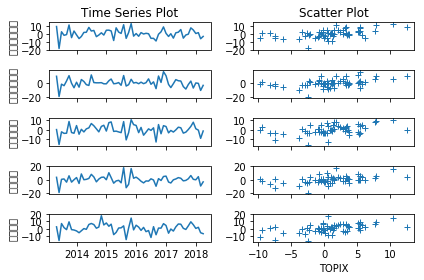

In [63]:
R = (stockvalue.diff()/stockvalue.shift(1))[1:] * 100
R.index = pd.date_range('2013-4-1', periods=R.shape[0], freq='M')
Y = R['TOPIX']
del R['TOPIX']
T, N = R.shape
StockList = R.columns
Coefs = pd.DataFrame([la.lstsq(np.vstack((np.ones(T), Y)).T, R[Stock])[0] \
                     for Stock in StockList],
                     index=StockList, columns=['$\\alpha$','$\\beta$'])
fig, ax = plt.subplots(N, 2, sharex='col', facecolor='w')
ax[0, 0].set_title('Time Series Plot')
ax[0, 1].set_title('Scatter Plot')
for index, Stock in enumerate(StockList):
    ax[index, 0].plot(R[Stock])
    ax[index, 0].set_ylabel(Stock)
    ax[index, 1].plot(Y, R[Stock], '+')
ax[-1, 1].set_xlabel('TOPIX')
plt.tight_layout()
plt.savefig('Report6_glaph.png', dpi=300)
plt.show()

In [61]:
Coefs

,$\alpha$,$\beta$
東京急行電鉄,-0.207205,0.628699
京浜急行電鉄,-0.484690,0.585446
小田急電鉄,-0.482484,0.502529
京王電鉄,-0.223444,0.625058
京成電鉄,0.315968,0.726011


In [62]:
plt.savefig('Report5_glaph.png', dpi=300)

<Figure size 432x288 with 0 Axes>